# This code is to find out the different of each epoch and batch size combination

In [19]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Path

In [20]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/googlenet_mod1'
data_path2 = parent_path / 'Data/googlenet_mod2'
data_path3 = parent_path / 'Data/googlenet_mod3'
data_path4 = parent_path / 'Data/googlenet_mod4'
print('The data path is:', data_path1, data_path2, data_path3)

The current path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/code
The parent path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod1 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod2 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod3


### extract data

In [21]:
fashion_path = 'fashion_mnist'
cifar_path = 'cifar100'

In [22]:
batch_sizes = [256]
epochs = [20]
rounds = 1
folder_name = f"E{epochs[0]}_B{batch_sizes[0]}_R{rounds-1}"
print(folder_name)

E20_B256_R0


In [23]:
f_path = fashion_path + '/' + folder_name
c_path = cifar_path + '/' + folder_name
print(f_path, c_path)

fashion_mnist/E20_B256_R0 cifar100/E20_B256_R0


#### read all the data from all the folders

In [24]:
# find the files path
mod1_path_f = data_path1 / f_path
mod2_path_f = data_path2 / f_path    
mod3_path_f = data_path3 / f_path
mod4_path_f = data_path4 / f_path
print('The model path is:', mod1_path_f,'\n',
                            mod2_path_f,'\n',
                            mod3_path_f,'\n',
                            mod4_path_f)
print('*'*50)
mod1_path_c = data_path1 / c_path
mod2_path_c = data_path2 / c_path
mod3_path_c = data_path3 / c_path
mod4_path_c = data_path4 / c_path
print('The model path is:', mod1_path_c,'\n',
                            mod2_path_c,'\n',
                            mod3_path_c,'\n',
                            mod4_path_c)

The model path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod1/fashion_mnist/E20_B256_R0 
 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod2/fashion_mnist/E20_B256_R0 
 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod3/fashion_mnist/E20_B256_R0 
 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod4/fashion_mnist/E20_B256_R0
**************************************************
The model path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod1/cifar100/E20_B256_R0 
 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod2/cifar100/E20_B256_R0 
 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod3/cifar100/E20_B256_R0 
 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod4/cifar100/E20_B256_R0


In [25]:
# for each path, there is fashionMNIST dataset and CIFAR100 dataset, stored in different folders
# find the files in the folder
mod_path_f = [mod1_path_f, mod2_path_f, mod3_path_f, mod4_path_f]
mod_path_c = [mod1_path_c, mod2_path_c, mod3_path_c, mod4_path_c]
for i in range(4):
    # find the files in the folder
    files_f = os.listdir(mod_path_f[i])
    files_c = os.listdir(mod_path_c[i])
    print(f'The files in the folder {mod_path_f[i]} and folder {mod_path_c[i]} are: {files_f}, {files_c}')

The files in the folder /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod1/fashion_mnist/E20_B256_R0 and folder /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod1/cifar100/E20_B256_R0 are: ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy'], ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']
The files in the folder /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod2/fashion_mnist/E20_B256_R0 and folder /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod2/cifar100/E20_B256_R0 are: ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy'], ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']
The files in the folder /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet_mod3/fashion_mnist/E20_B256_R0 and folder /U

## Load files

### fashionmnist

In [26]:
# read all the files in all the folders
# LayersTime
LayersTime_mod1f = np.load(mod_path_f[0] / 'Layers_time.npy', allow_pickle=True)
LayersTime_mod2f = np.load(mod_path_f[1] / 'Layers_time.npy', allow_pickle=True)
LayersTime_mod3f = np.load(mod_path_f[2] / 'Layers_time.npy', allow_pickle=True)
LayersTime_mod4f = np.load(mod_path_f[3] / 'Layers_time.npy', allow_pickle=True)
# TrainPartTime
TrainPartTime_mod1f = np.load(mod_path_f[0] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod2f = np.load(mod_path_f[1] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod3f = np.load(mod_path_f[2] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod4f = np.load(mod_path_f[3] / 'Train_part_time.npy', allow_pickle=True)
# EpochTime
EpochTime_mod1f = np.load(mod_path_f[0] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod2f = np.load(mod_path_f[1] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod3f = np.load(mod_path_f[2] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod4f = np.load(mod_path_f[3] / 'Epoch_time.npy', allow_pickle=True)
# EpochEnergy
EpochEnergy_mod1f = np.load(mod_path_f[0] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod2f = np.load(mod_path_f[1] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod3f = np.load(mod_path_f[2] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod4f = np.load(mod_path_f[3] / 'Epoch_energy.npy', allow_pickle=True)

# print(f'LayersTime_mod1f: {LayersTime_mod1f}','\n',
#       f'LayersTime_mod2f: {LayersTime_mod2f}','\n',
#       f'LayersTime_mod3f: {LayersTime_mod3f}','\n',
#       f'LayersTime_mod4f: {LayersTime_mod4f}')

#### LayersTime

In [27]:
LayersName = ['S0_C0', 'S0_R1', 'S0_M2', 'S1_C0', 'S1_R1', 'S1_C2', 'S1_R3', 'S1_M4', 'S2_I0', 'S2_I1', 'S2_M2', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S3_M5', 'S4_I0', 'S4_I1', 'S4_A2', 'S4_F3']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 21


In [28]:
LayersTime_flist = [LayersTime_mod1f, LayersTime_mod2f, LayersTime_mod3f, LayersTime_mod4f]

/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_98559/886318222.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(LayersName, rotation=45)


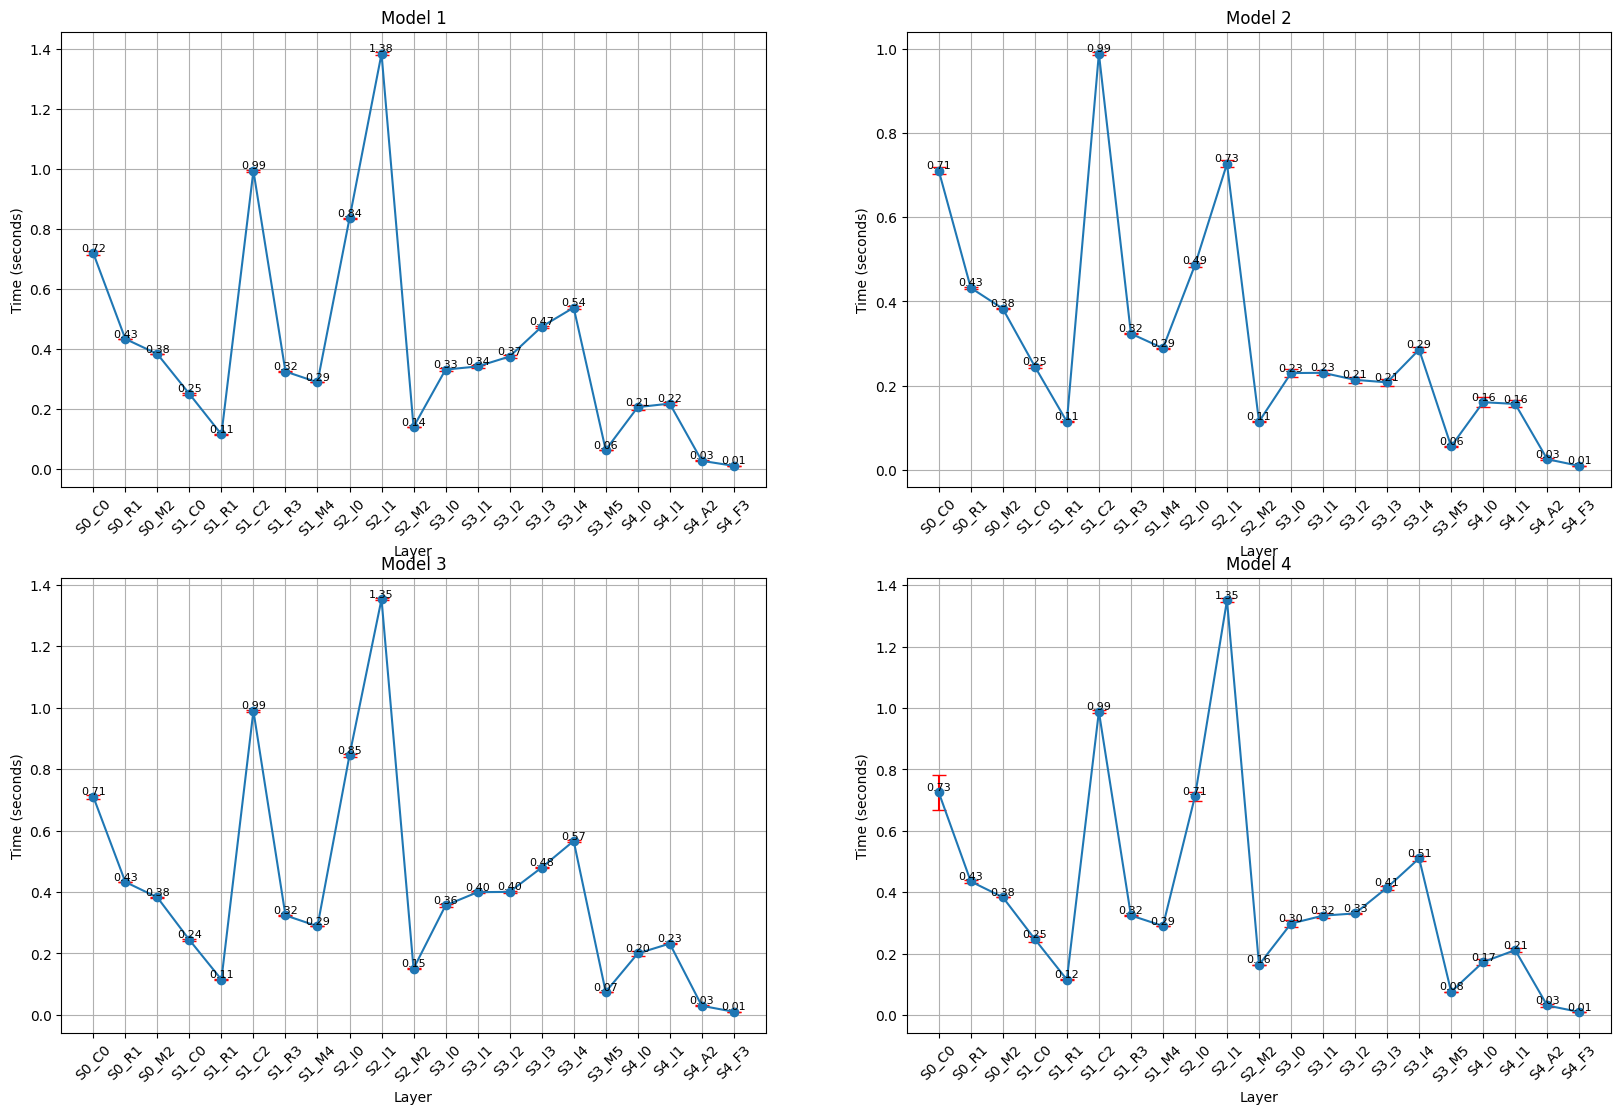

In [29]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(20, 13))
for i, ax in enumerate(axs.flat):
    LayersTimei = LayersTime_flist[i]
    # Calculate the mean and standard deviation for each layer
    layer_means = np.mean(LayersTimei, axis=1)
    layer_stds = np.std(LayersTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Model {i+1}')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(LayersName, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(layer_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)


In [30]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'I' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S2_I0', 'S2_I1', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S4_I0', 'S4_I1']
The inception block indexes are [8, 9, 11, 12, 13, 14, 15, 17, 18]


In [31]:
IncepNum = len(IncepBlock)
IncepTime_mod1f = np.zeros((IncepNum, epochs[0]))
IncepTime_mod2f = np.zeros((IncepNum, epochs[0]))
IncepTime_mod3f = np.zeros((IncepNum, epochs[0]))
IncepTime_mod4f = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime_mod1f[i,:] = LayersTime_mod1f[IncepBlockIndex[i], :]
    IncepTime_mod2f[i,:] = LayersTime_mod2f[IncepBlockIndex[i], :]
    IncepTime_mod3f[i,:] = LayersTime_mod3f[IncepBlockIndex[i], :]
    IncepTime_mod4f[i,:] = LayersTime_mod4f[IncepBlockIndex[i], :]
# print(f'The inception time of model 1 is {IncepTime_mod1f}','\n',
#       f'The inception time of model 2 is {IncepTime_mod2f}','\n',
#       f'The inception time of model 3 is {IncepTime_mod3f}','\n',
#       f'The inception time of model 4 is {IncepTime_mod4f}')

In [32]:
IncepTime_flist = [IncepTime_mod1f, IncepTime_mod2f, IncepTime_mod3f, IncepTime_mod4f]

/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_98559/1132251443.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(IncepBlock, rotation=45)


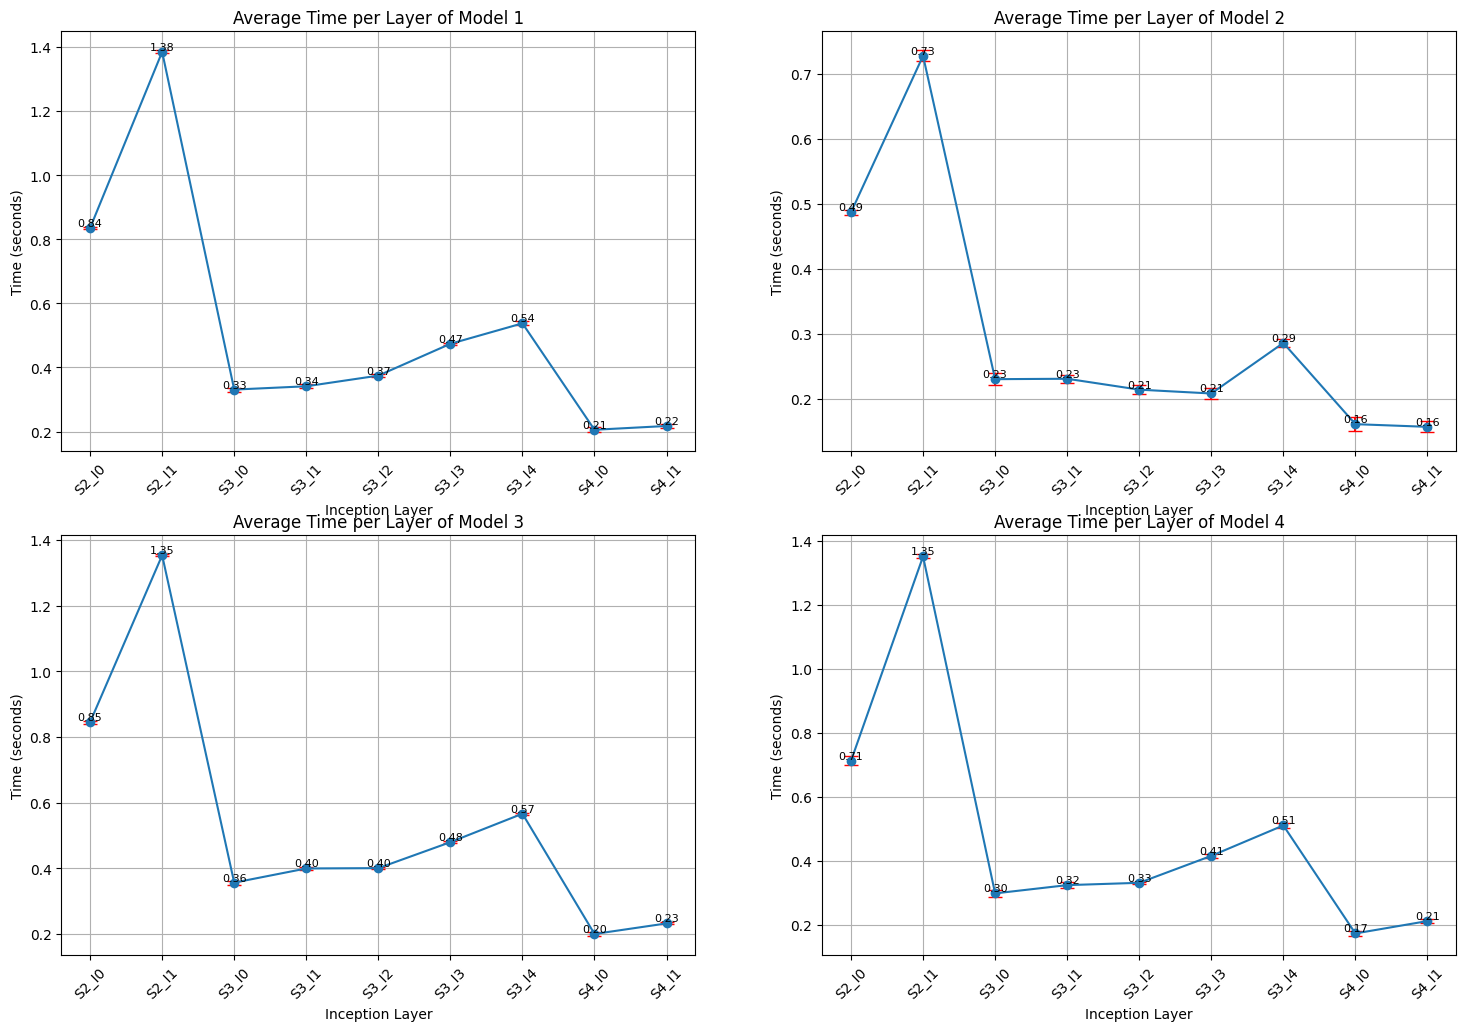

In [33]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
for i, ax in enumerate(axs.flat):
    IncepTimei = IncepTime_flist[i]
    # Calculate the mean and standard deviation for each layer
    inceplayer_means = np.mean(IncepTimei, axis=1)
    inceplayer_stds = np.std(IncepTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Average Time per Layer of Model {i+1}')
    ax.set_xlabel('Inception Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(IncepBlock, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(inceplayer_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)

#### TrainPartTime

In [34]:
TrainPartName = ['TimeToDevice', 'Forward', 'Backward', 'Test']

In [35]:
TrainPartTime_flist = [TrainPartTime_mod1f, TrainPartTime_mod2f, TrainPartTime_mod3f, TrainPartTime_mod4f]

/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_98559/2325149302.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(TrainPartName, rotation=45)


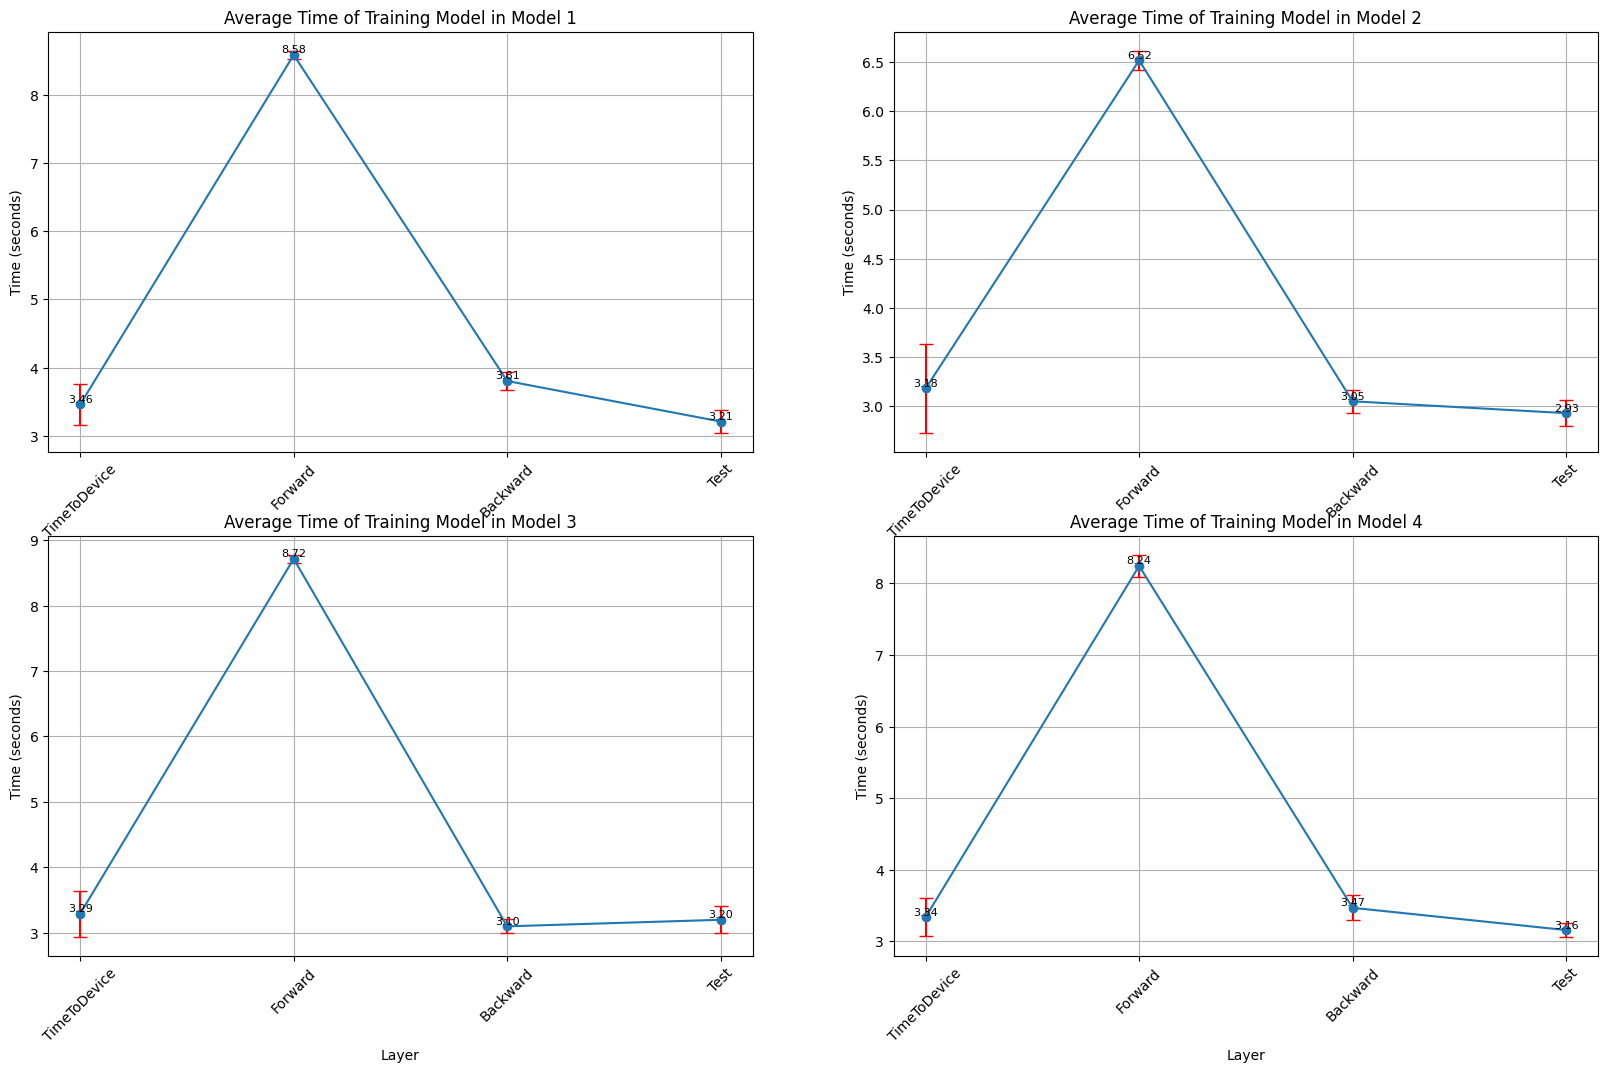

In [36]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for i, ax in enumerate(axs.flat):
    TrainPartTimei = TrainPartTime_flist[i]
    # Calculate the mean and standard deviation for each layer
    TrainPartTimei_means = np.mean(TrainPartTimei, axis=1)
    TrainPartTimei_stds = np.std(TrainPartTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(TrainPartName, TrainPartTimei_means, yerr=TrainPartTimei_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Average Time of Training Model in Model {i+1}')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(TrainPartName, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(TrainPartTimei_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)

#### EnergyEpoch

In [37]:
EpochEnergy_flist = [EpochEnergy_mod1f, EpochEnergy_mod2f, EpochEnergy_mod3f, EpochEnergy_mod4f]
# print(EpochEnergy_flist)
EpochEnergy_f = np.zeros((4, epochs[0]))
# print(EpochEnergy_f)

In [38]:
for i in range(len(EpochEnergy_flist)):
    for epoch in range(len(EpochEnergy_flist[i])):
        EpochEnergy_fi = EpochEnergy_flist[i]
        epoch_energy = EpochEnergy_fi[epoch][0]
#         # print(f'The energy of epoch {i} is {epoch_energy}')
        epoch_total_energy = sum(epoch_energy)
#         print(f'The total energy of epoch {epoch} is {epoch_total_energy:.2f}') 
        epoch_total_energy = np.round(epoch_total_energy, 2)
        EpochEnergy_f[i, epoch] = epoch_total_energy
print(f'The total energy of each epoch in the model is {EpochEnergy_f}')

The total energy of each epoch in the model is [[ 8897.01  9318.65  9403.35  9471.45  9355.25  9481.95  9594.92  9639.62
   9566.37  9594.    9618.04  9563.69  9684.46  9433.14  9388.59  9687.78
   9495.47  9698.61  9639.64  9575.62]
 [ 6454.22  6762.39  6938.91  7010.36  6748.46  6839.53  7012.38  7068.14
   7096.4   7097.7   7021.76  6975.45  7012.81  6984.58  6990.89  6860.11
   7043.08  6934.78  7126.39  6939.88]
 [ 9283.41  9626.07  9700.02  9693.24  9962.91  9870.55  9844.98  9872.36
   9987.    9957.62 10025.58  9909.88  9715.95 10015.71 10012.42  9880.96
   9882.92  9843.54  9824.56  9762.88]
 [ 8703.5   9018.25  9261.04  9367.59  9426.97  9377.2   9339.56  9329.31
   9488.35  9393.51  9344.42  9481.42  9369.94  9587.29  9411.97  9361.89
   9292.76  9407.89  9501.43  9532.11]]


In [39]:
Model_type = ['Model1', 'Model2', 'Model3', 'Model4']

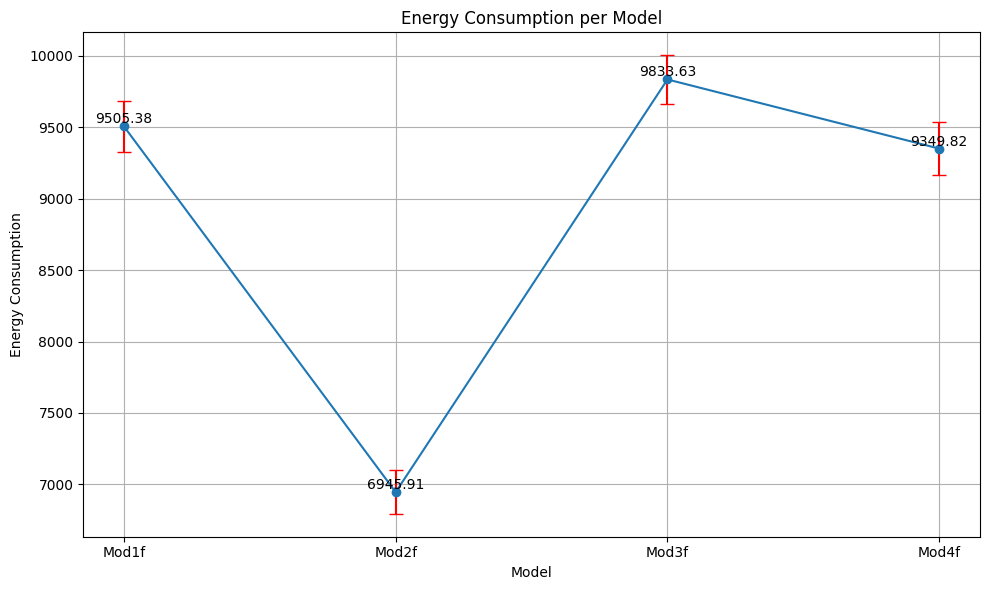

In [40]:
# Define the function to plot energy consumption
def plot_energy_consumption(EpochEnergy_f, title):
    epoch_means = np.mean(EpochEnergy_f, axis=1)
    epoch_stds = np.std(EpochEnergy_f, axis=1)
    
    plt.errorbar(np.arange(1, 5), epoch_means, yerr=epoch_stds, fmt='-o', ecolor='r', capsize=5)
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Energy Consumption')
    plt.xticks(np.arange(1, 5), ['Mod1f', 'Mod2f', 'Mod3f', 'Mod4f'])
    plt.grid(True)
    
    for i, mean in enumerate(epoch_means):
        plt.text(i + 1, mean, f'{mean:.2f}', ha='center', va='bottom')

# Plot the energy consumption
plt.figure(figsize=(10, 6))
plot_energy_consumption(EpochEnergy_f, 'Energy Consumption per Model')
plt.tight_layout()
plt.show()

### cifar100

In [41]:
# read all the files in all the folders
# LayersTime
LayersTime_mod1c = np.load(mod_path_c[0] / 'Layers_time.npy', allow_pickle=True)
LayersTime_mod2c = np.load(mod_path_c[1] / 'Layers_time.npy', allow_pickle=True)
LayersTime_mod3c = np.load(mod_path_c[2] / 'Layers_time.npy', allow_pickle=True)
LayersTime_mod4c = np.load(mod_path_c[3] / 'Layers_time.npy', allow_pickle=True)
# TrainPartTime
TrainPartTime_mod1c = np.load(mod_path_c[0] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod2c = np.load(mod_path_c[1] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod3c = np.load(mod_path_c[2] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod4c = np.load(mod_path_c[3] / 'Train_part_time.npy', allow_pickle=True)
# EpochTime
EpochTime_mod1c = np.load(mod_path_c[0] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod2c = np.load(mod_path_c[1] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod3c = np.load(mod_path_c[2] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod4c = np.load(mod_path_c[3] / 'Epoch_time.npy', allow_pickle=True)
# EpochEnergy
EpochEnergy_mod1c = np.load(mod_path_c[0] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod2c = np.load(mod_path_c[1] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod3c = np.load(mod_path_c[2] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod4c = np.load(mod_path_c[3] / 'Epoch_energy.npy', allow_pickle=True)

In [42]:
LayersTime_clist = [LayersTime_mod1c, LayersTime_mod2c, LayersTime_mod3c, LayersTime_mod4c]

/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_98559/3459181537.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(LayersName, rotation=45)


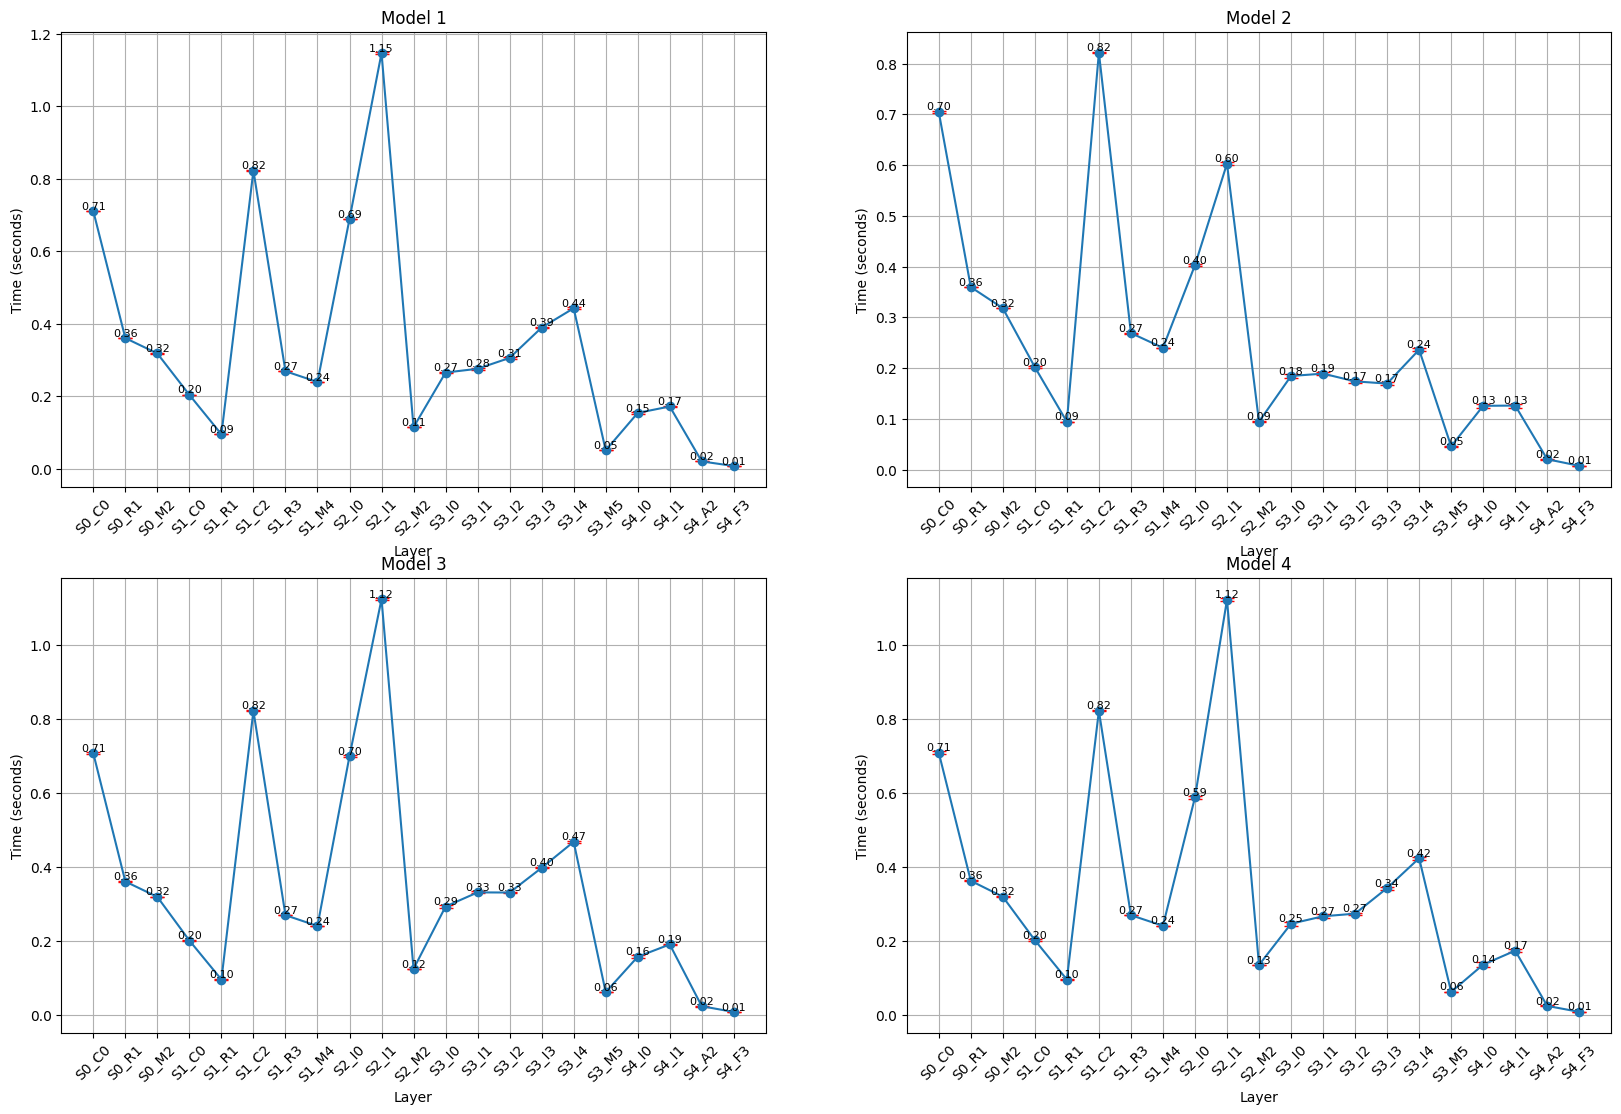

In [43]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(20, 13))
for i, ax in enumerate(axs.flat):
    LayersTimei = LayersTime_clist[i]
    # Calculate the mean and standard deviation for each layer
    layer_means = np.mean(LayersTimei, axis=1)
    layer_stds = np.std(LayersTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Model {i+1}')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(LayersName, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(layer_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)


In [44]:
IncepNum = len(IncepBlock)
IncepTime_mod1c = np.zeros((IncepNum, epochs[0]))
IncepTime_mod2c = np.zeros((IncepNum, epochs[0]))
IncepTime_mod3c = np.zeros((IncepNum, epochs[0]))
IncepTime_mod4c = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime_mod1c[i,:] = LayersTime_mod1c[IncepBlockIndex[i], :]
    IncepTime_mod2c[i,:] = LayersTime_mod2c[IncepBlockIndex[i], :]
    IncepTime_mod3c[i,:] = LayersTime_mod3c[IncepBlockIndex[i], :]
    IncepTime_mod4c[i,:] = LayersTime_mod4c[IncepBlockIndex[i], :]

In [45]:
IncepTime_clist = [IncepTime_mod1c, IncepTime_mod2c, IncepTime_mod3c, IncepTime_mod4c]

/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_98559/2849450503.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(IncepBlock, rotation=45)


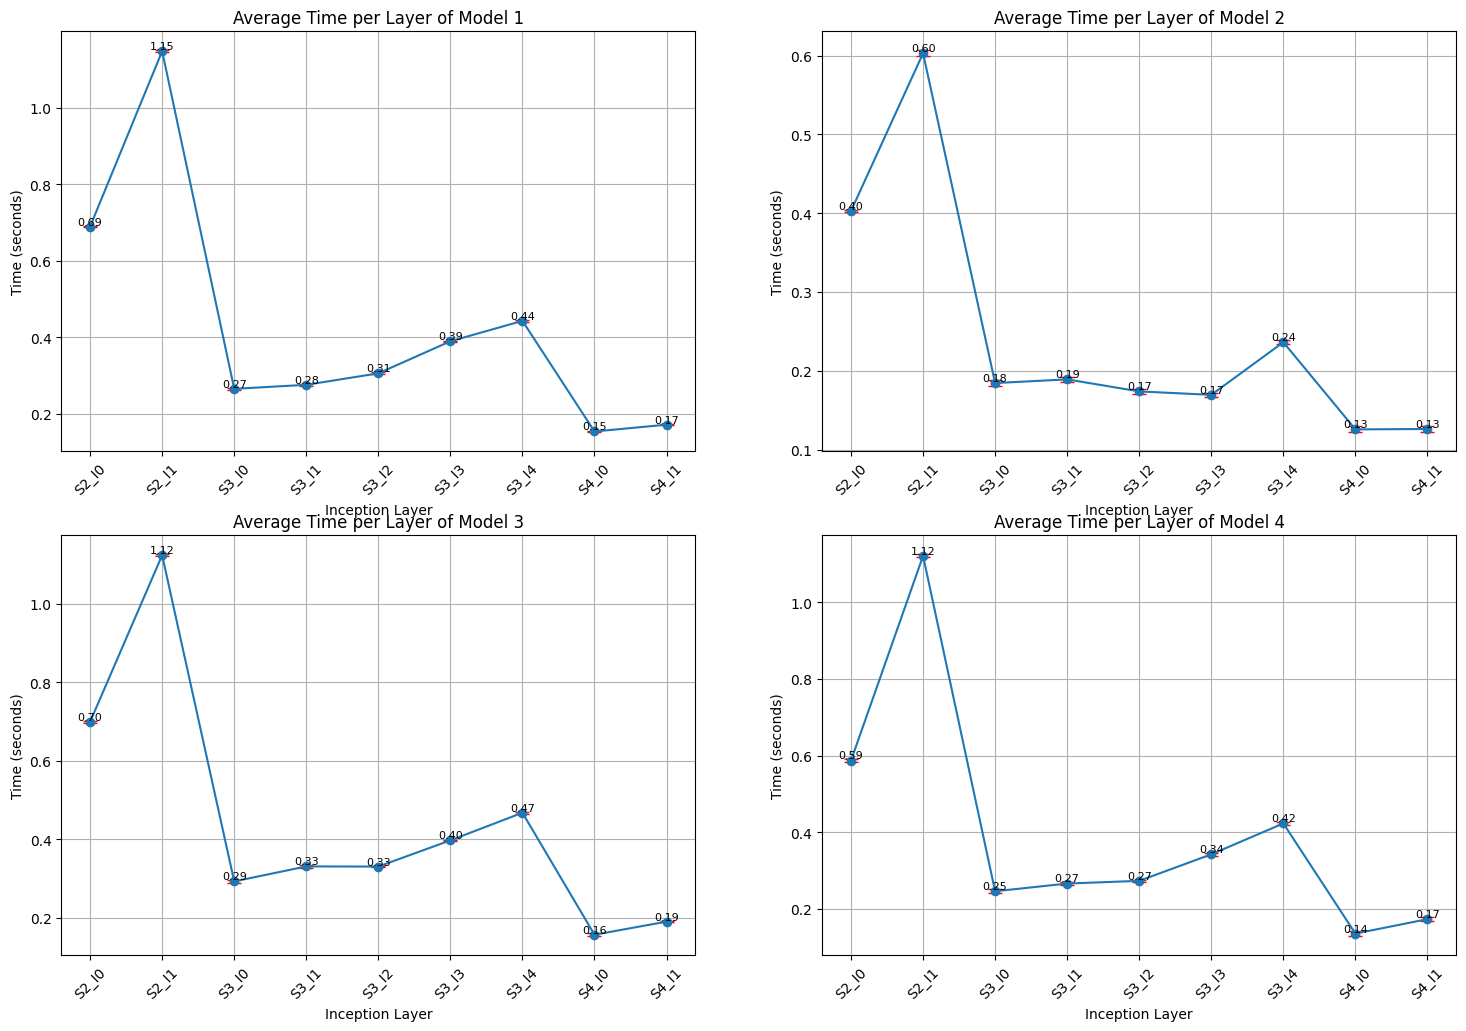

In [46]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
for i, ax in enumerate(axs.flat):
    IncepTimei = IncepTime_clist[i]
    # Calculate the mean and standard deviation for each layer
    inceplayer_means = np.mean(IncepTimei, axis=1)
    inceplayer_stds = np.std(IncepTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Average Time per Layer of Model {i+1}')
    ax.set_xlabel('Inception Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(IncepBlock, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(inceplayer_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)

In [47]:
TrainPartTime_clist = [TrainPartTime_mod1c, TrainPartTime_mod2c, TrainPartTime_mod3c, TrainPartTime_mod4c]

/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_98559/4007285993.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(TrainPartName, rotation=45)


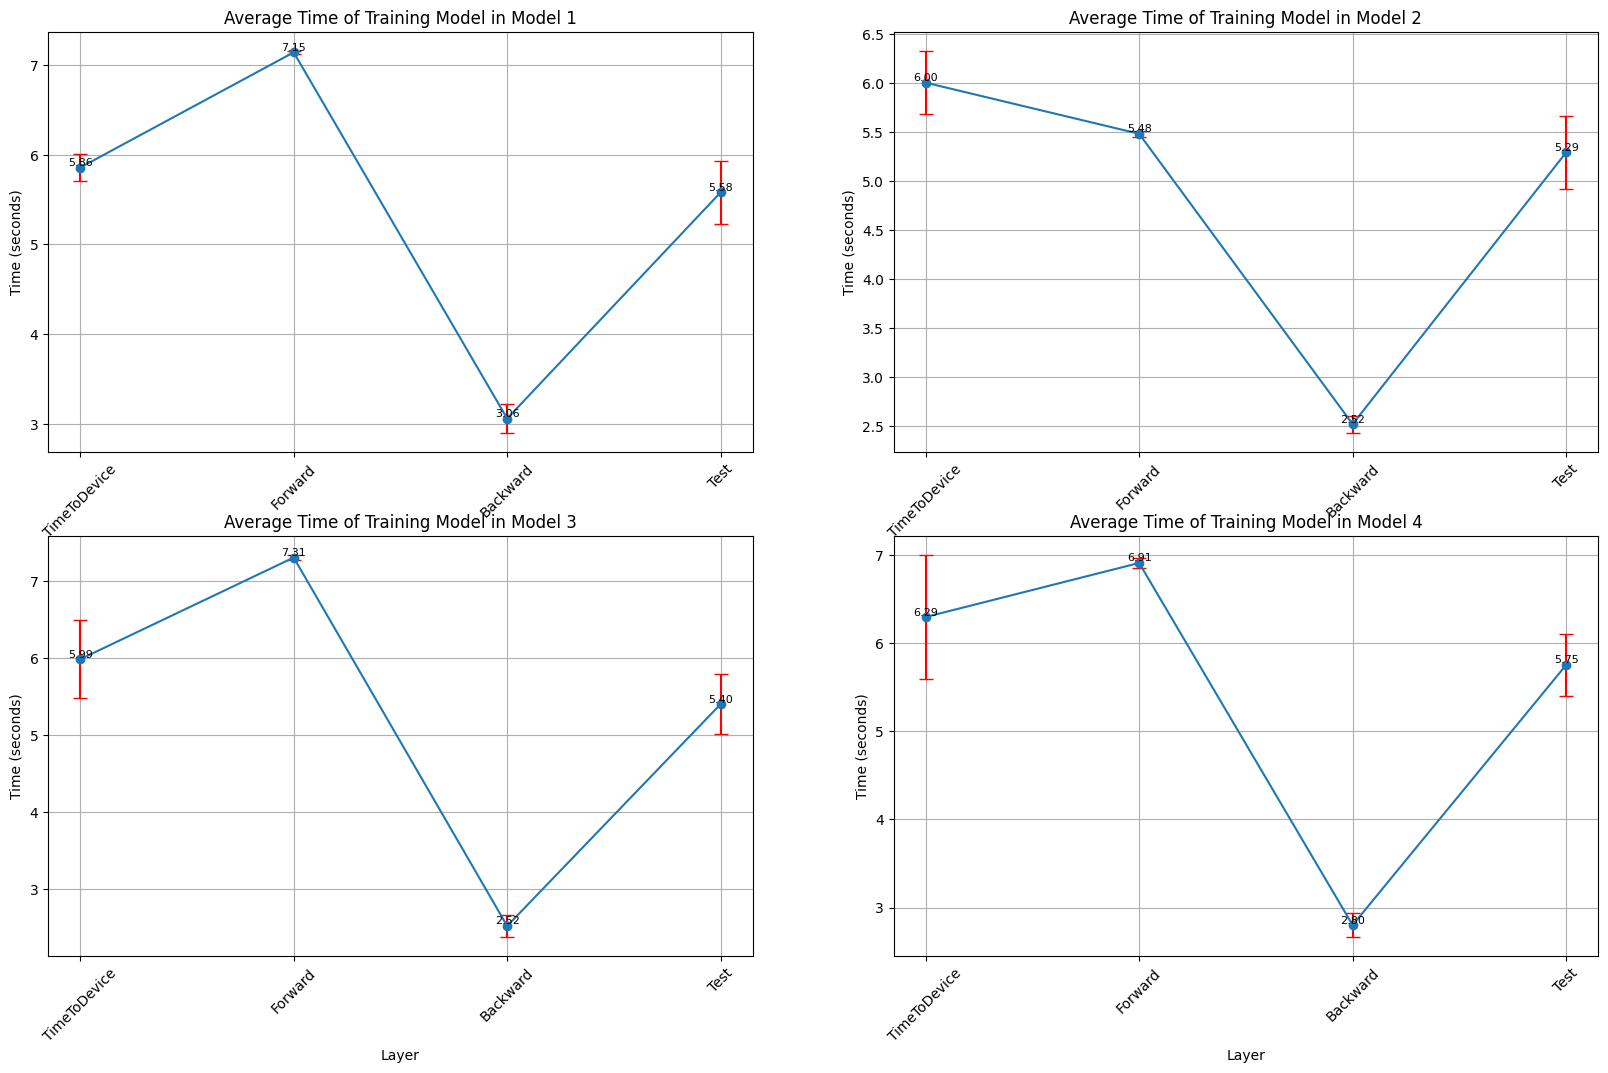

In [48]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for i, ax in enumerate(axs.flat):
    TrainPartTimei = TrainPartTime_clist[i]
    # Calculate the mean and standard deviation for each layer
    TrainPartTimei_means = np.mean(TrainPartTimei, axis=1)
    TrainPartTimei_stds = np.std(TrainPartTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(TrainPartName, TrainPartTimei_means, yerr=TrainPartTimei_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Average Time of Training Model in Model {i+1}')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(TrainPartName, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(TrainPartTimei_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)

In [49]:
EpochEnergy_clist = [EpochEnergy_mod1c, EpochEnergy_mod2c, EpochEnergy_mod3c, EpochEnergy_mod4c]
# print(EpochEnergy_flist)
EpochEnergy_c = np.zeros((4, epochs[0]))
# print(EpochEnergy_f)

In [50]:
for i in range(len(EpochEnergy_clist)):
    for epoch in range(len(EpochEnergy_clist[i])):
        EpochEnergy_ci = EpochEnergy_clist[i]
        epoch_energy = EpochEnergy_ci[epoch][0]
#         # print(f'The energy of epoch {i} is {epoch_energy}')
        epoch_total_energy = sum(epoch_energy)
#         print(f'The total energy of epoch {epoch} is {epoch_total_energy:.2f}') 
        epoch_total_energy = np.round(epoch_total_energy, 2)
        EpochEnergy_c[i, epoch] = epoch_total_energy
print(f'The total energy of each epoch in the model is {EpochEnergy_c}')

The total energy of each epoch in the model is [[8574.58 8838.48 8731.77 8759.93 8895.32 8928.58 8779.33 8811.11 8767.71
  8886.2  8822.54 8726.3  8905.08 8912.19 8904.87 8743.59 8806.44 8911.39
  8851.15 8794.27]
 [6431.22 6606.4  6717.46 6613.17 6816.42 6678.81 6745.32 6559.57 6758.42
  6616.88 6762.02 6575.68 6610.2  6524.87 6671.06 6700.95 6676.83 6730.01
  6636.25 6684.65]
 [9033.75 8997.27 9065.89 9112.71 9059.27 9010.91 9071.28 9136.28 9159.99
  9007.53 9195.26 9115.3  9108.74 9038.23 9123.78 9114.11 9118.96 9145.51
  9147.67 9212.3 ]
 [8764.3  8595.56 8656.82 8831.94 8647.26 8648.75 8585.78 8806.48 8715.16
  8501.67 8620.55 8753.64 8936.79 8634.71 8732.17 8811.92 8708.84 8852.44
  9007.9  8661.26]]


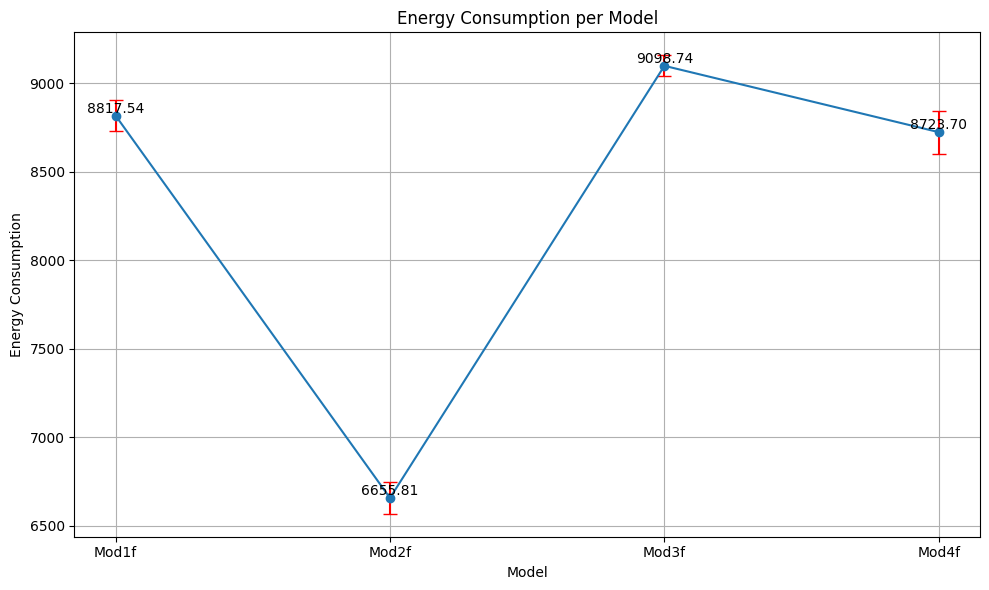

In [51]:
# Define the function to plot energy consumption
def plot_energy_consumption(EpochEnergy_c, title):
    epoch_means = np.mean(EpochEnergy_c, axis=1)
    epoch_stds = np.std(EpochEnergy_c, axis=1)
    
    plt.errorbar(np.arange(1, 5), epoch_means, yerr=epoch_stds, fmt='-o', ecolor='r', capsize=5)
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Energy Consumption')
    plt.xticks(np.arange(1, 5), ['Mod1f', 'Mod2f', 'Mod3f', 'Mod4f'])
    plt.grid(True)
    
    for i, mean in enumerate(epoch_means):
        plt.text(i + 1, mean, f'{mean:.2f}', ha='center', va='bottom')

# Plot the energy consumption
plt.figure(figsize=(10, 6))
plot_energy_consumption(EpochEnergy_c, 'Energy Consumption per Model')
plt.tight_layout()
plt.show()